In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

import os
import csv
import json
import random

In [10]:
# Import API key
from config import weather_api_key


In [11]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [12]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [13]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [14]:
 # GENERATE CITIES LIST
    
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [15]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [16]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)   

632

In [17]:
# create lists to store the data
name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

In [18]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key} 

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key

    
count=1

    
for city in cities: 
    cityurl = url+"&q="+city 
    response=requests.get(cityurl).json()
        
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])          
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])          
        date.append(response["dt"]) 
        print(f"Processing Record {count} of Set 1 | {city}")
        count = count + 1
    except (KeyError, IndexError):
        print ("City Not Found")
        
          


Processing Record 1 of Set 1 | kalmunai
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | antsohihy
Processing Record 4 of Set 1 | ixtapa
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | lompoc
City Not Found
Processing Record 7 of Set 1 | yarmouth
Processing Record 8 of Set 1 | gamba
Processing Record 9 of Set 1 | tuatapere
City Not Found
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | port alfred
City Not Found
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | kirkwood
Processing Record 16 of Set 1 | charters towers
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | faya
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | dingle
Processing Record 24 of S

Processing Record 192 of Set 1 | san patricio
Processing Record 193 of Set 1 | cabinda
Processing Record 194 of Set 1 | umm lajj
Processing Record 195 of Set 1 | yulara
Processing Record 196 of Set 1 | taoudenni
Processing Record 197 of Set 1 | praia da vitoria
Processing Record 198 of Set 1 | whyalla
Processing Record 199 of Set 1 | kattivakkam
Processing Record 200 of Set 1 | cidreira
City Not Found
Processing Record 201 of Set 1 | ostrovnoy
Processing Record 202 of Set 1 | huainan
Processing Record 203 of Set 1 | alofi
Processing Record 204 of Set 1 | synya
Processing Record 205 of Set 1 | honningsvag
Processing Record 206 of Set 1 | gua musang
Processing Record 207 of Set 1 | dali
Processing Record 208 of Set 1 | dabhoi
Processing Record 209 of Set 1 | kijang
Processing Record 210 of Set 1 | madras
Processing Record 211 of Set 1 | canapi
Processing Record 212 of Set 1 | hofn
Processing Record 213 of Set 1 | bucak
Processing Record 214 of Set 1 | beloha
Processing Record 215 of Set 

Processing Record 383 of Set 1 | pangkalanbuun
Processing Record 384 of Set 1 | alugan
Processing Record 385 of Set 1 | iqaluit
Processing Record 386 of Set 1 | chipinge
City Not Found
Processing Record 387 of Set 1 | korla
Processing Record 388 of Set 1 | chodziez
Processing Record 389 of Set 1 | pacific grove
Processing Record 390 of Set 1 | walvis bay
Processing Record 391 of Set 1 | athabasca
Processing Record 392 of Set 1 | lalsk
Processing Record 393 of Set 1 | inhambane
Processing Record 394 of Set 1 | bonavista
Processing Record 395 of Set 1 | saryozek
City Not Found
Processing Record 396 of Set 1 | san policarpo
Processing Record 397 of Set 1 | belmonte
Processing Record 398 of Set 1 | severnoye
Processing Record 399 of Set 1 | husavik
Processing Record 400 of Set 1 | abu dhabi
Processing Record 401 of Set 1 | zhigansk
Processing Record 402 of Set 1 | bubaque
Processing Record 403 of Set 1 | aripuana
Processing Record 404 of Set 1 | dikson
Processing Record 405 of Set 1 | mald

Processing Record 574 of Set 1 | furano
Processing Record 575 of Set 1 | palang
Processing Record 576 of Set 1 | claveria
Processing Record 577 of Set 1 | tilichiki
Processing Record 578 of Set 1 | surt
Processing Record 579 of Set 1 | baculin
Processing Record 580 of Set 1 | pachino
Processing Record 581 of Set 1 | rodino
Processing Record 582 of Set 1 | malinovoye ozero
Processing Record 583 of Set 1 | kutum
City Not Found
Processing Record 584 of Set 1 | buala
Processing Record 585 of Set 1 | portland
Processing Record 586 of Set 1 | zyryanovsk
Processing Record 587 of Set 1 | fengrun


In [19]:
# Export the city data into a .csv.
# Display the DataFrame

weather_dict = {"City": name,"Latitude": lat, "Longitude":lng,
                "Max Temp":temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind,"Country":country, "Date":date}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df

weather_data_df.to_csv("cities.csv")

In [21]:
# Inspect the data and remove cities were the humidity is > 100%
# Skip this step if there are no cities that have humidity > 100%.
weather_data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,19.303288,21.074991,58.474787,73.601363,57.049404,8.019080,1.603662e+09
std,32.912825,91.034271,20.934261,19.409751,38.540957,5.383837,7.555292e+01
min,-54.800000,-179.170000,-2.720000,12.000000,0.000000,0.200000,1.603662e+09
25%,-6.860000,-57.180000,44.635000,65.000000,20.000000,3.970000,1.603662e+09
50%,23.220000,23.270000,63.410000,78.000000,75.000000,6.870000,1.603662e+09
75%,45.685000,101.865000,75.980000,88.000000,92.000000,11.375000,1.603662e+09
max,78.220000,179.320000,95.090000,100.000000,100.000000,29.970000,1.603662e+09


In [22]:
print(f"There are no cities with humidity greater than 100%")

There are no cities with humidity greater than 100%


Text(0, 0.5, 'Max Temperature (F)')

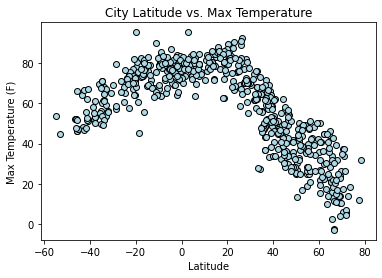

In [23]:
#Latitude vs. Temperature Plot
#plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")
plt.scatter(lat, temp, marker="o", facecolors="lightblue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


Text(0, 0.5, 'Humidity (%)')

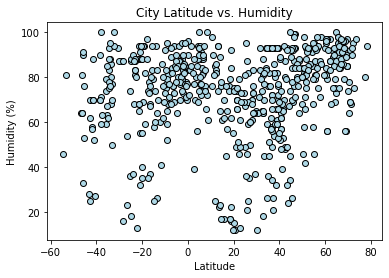

In [24]:
#Latitude vs. Humidity Plot
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


Text(0, 0.5, 'Cloudiness (%)')

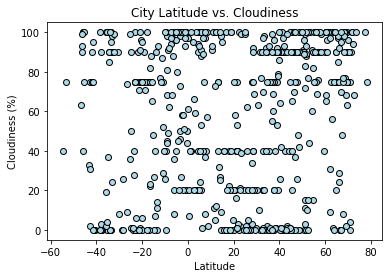

In [25]:
#Latitude vs. Cloudiness Plot
plt.scatter(lat, cloudiness, marker="o", facecolors="lightblue", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


Text(0, 0.5, 'Wind Speed (mph)')

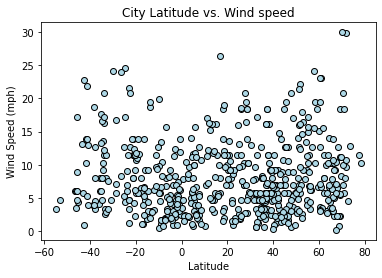

In [26]:
#Latitude vs. Wind Speed Plot
plt.scatter(lat, wind, marker="o", facecolors="lightblue", edgecolors="black")
plt.title("City Latitude vs. Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


In [29]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_data_df = weather_data_df.loc[weather_data_df["Latitude"] >= 0,:]
southern_city_data_df = weather_data_df.loc[weather_data_df["Latitude"] < 0,:]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Antsohihy,-14.88,47.99,75.85,58,27,5.99,MG,1603662340
4,Codrington,-38.27,141.97,51.96,70,0,18.77,AU,1603662340
7,Gamba,-2.65,10.00,76.68,88,100,8.25,GA,1603662341
8,Tuatapere,-46.13,167.68,52.00,64,90,5.99,NZ,1603662341
9,Punta Arenas,-53.15,-70.92,44.60,81,75,4.70,CL,1603662232


The r-squared is: 0.7568375590162391


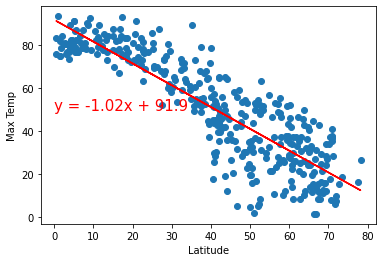

In [60]:
#Linear Regression
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_city_data_df["Latitude"]
y_values = northern_city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.563225481941616


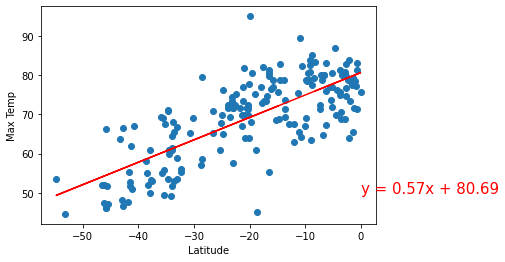

In [30]:
#Linear Regression
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_city_data_df["Latitude"]
y_values = southern_city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06531352364260268


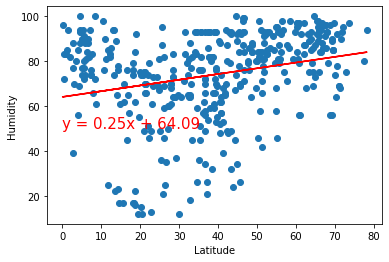

In [31]:
#Linear Regression
#Northern Hemisphere - Humidity vs. Latitude Linear Regression
x_values = northern_city_data_df["Latitude"]
y_values = northern_city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04826275454120763


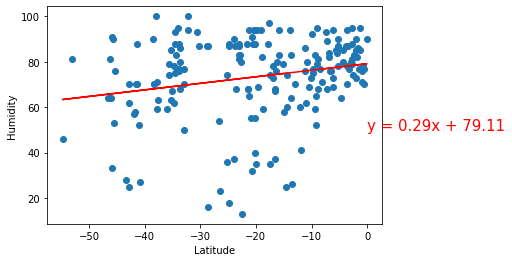

In [32]:
#Linear Regression
#Southern Hemisphere - Humidity vs. Latitude Linear Regression
x_values = southern_city_data_df["Latitude"]
y_values = southern_city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0468893751565849


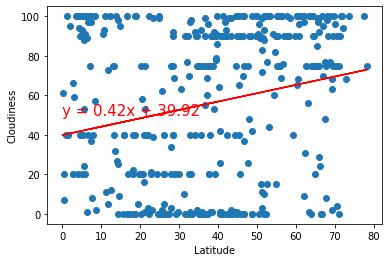

In [33]:
#Linear Regression
#Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = northern_city_data_df["Latitude"]
y_values = northern_city_data_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02008305062998379


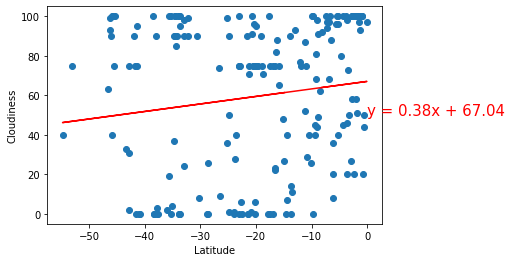

In [34]:
#Linear Regression
#Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = southern_city_data_df["Latitude"]
y_values = southern_city_data_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.016977567253943733


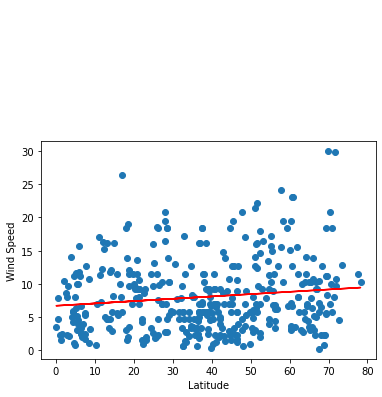

In [35]:
#Linear Regression
#Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = northern_city_data_df["Latitude"]
y_values = northern_city_data_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06737117383922664


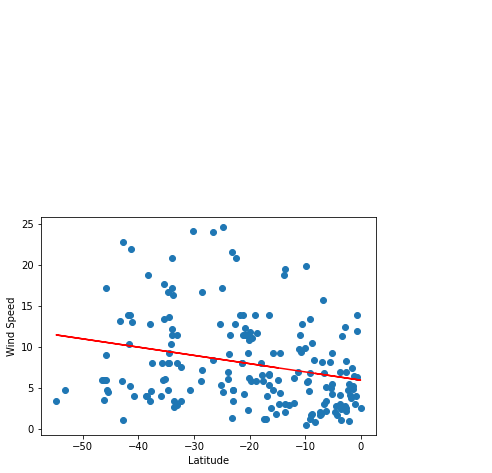

In [36]:
#Linear Regression
#Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = southern_city_data_df["Latitude"]
y_values = southern_city_data_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()